In [2]:
from astropy.io import fits

fname = "DR19seisages_samp_train456789_net10_method14151617_cluster1819_v2.fits"

with fits.open(fname, memmap=True) as hdul:
    cols = hdul["STARFLOW_TABLE"].columns.names
    print(len(cols))
    print(cols)

423
['sdss_id', 'sdss4_apogee_id', 'gaia_dr2_source_id', 'gaia_dr3_source_id', 'tic_v8_id', 'healpix', 'lead', 'version_id', 'catalogid', 'catalogid21', 'catalogid25', 'catalogid31', 'n_associated', 'n_neighborhood', 'sdss5_target_flags', 'sdss4_apogee_target1_flags', 'sdss4_apogee_target2_flags', 'sdss4_apogee2_target1_flags', 'sdss4_apogee2_target2_flags', 'sdss4_apogee2_target3_flags', 'sdss4_apogee_member_flags', 'sdss4_apogee_extra_target_flags', 'ra', 'dec', 'l', 'b', 'plx', 'e_plx', 'pmra', 'e_pmra', 'pmde', 'e_pmde', 'gaia_v_rad', 'gaia_e_v_rad', 'g_mag', 'bp_mag', 'rp_mag', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag', 'k_mag', 'e_k_mag', 'ph_qual', 'bl_flg', 'cc_flg', 'w1_mag', 'e_w1_mag', 'w1_flux', 'w1_dflux', 'w1_frac', 'w2_mag', 'e_w2_mag', 'w2_flux', 'w2_dflux', 'w2_frac', 'w1uflags', 'w2uflags', 'w1aflags', 'w2aflags', 'mag4_5', 'd4_5m', 'rms_f4_5', 'sqf_4_5', 'mf4_5', 'csf', 'zgr_teff', 'zgr_e_teff', 'zgr_logg', 'zgr_e_logg', 'zgr_fe_h', 'zgr_e_fe_h', 'zgr_e', 'zgr_e_e', 'zg

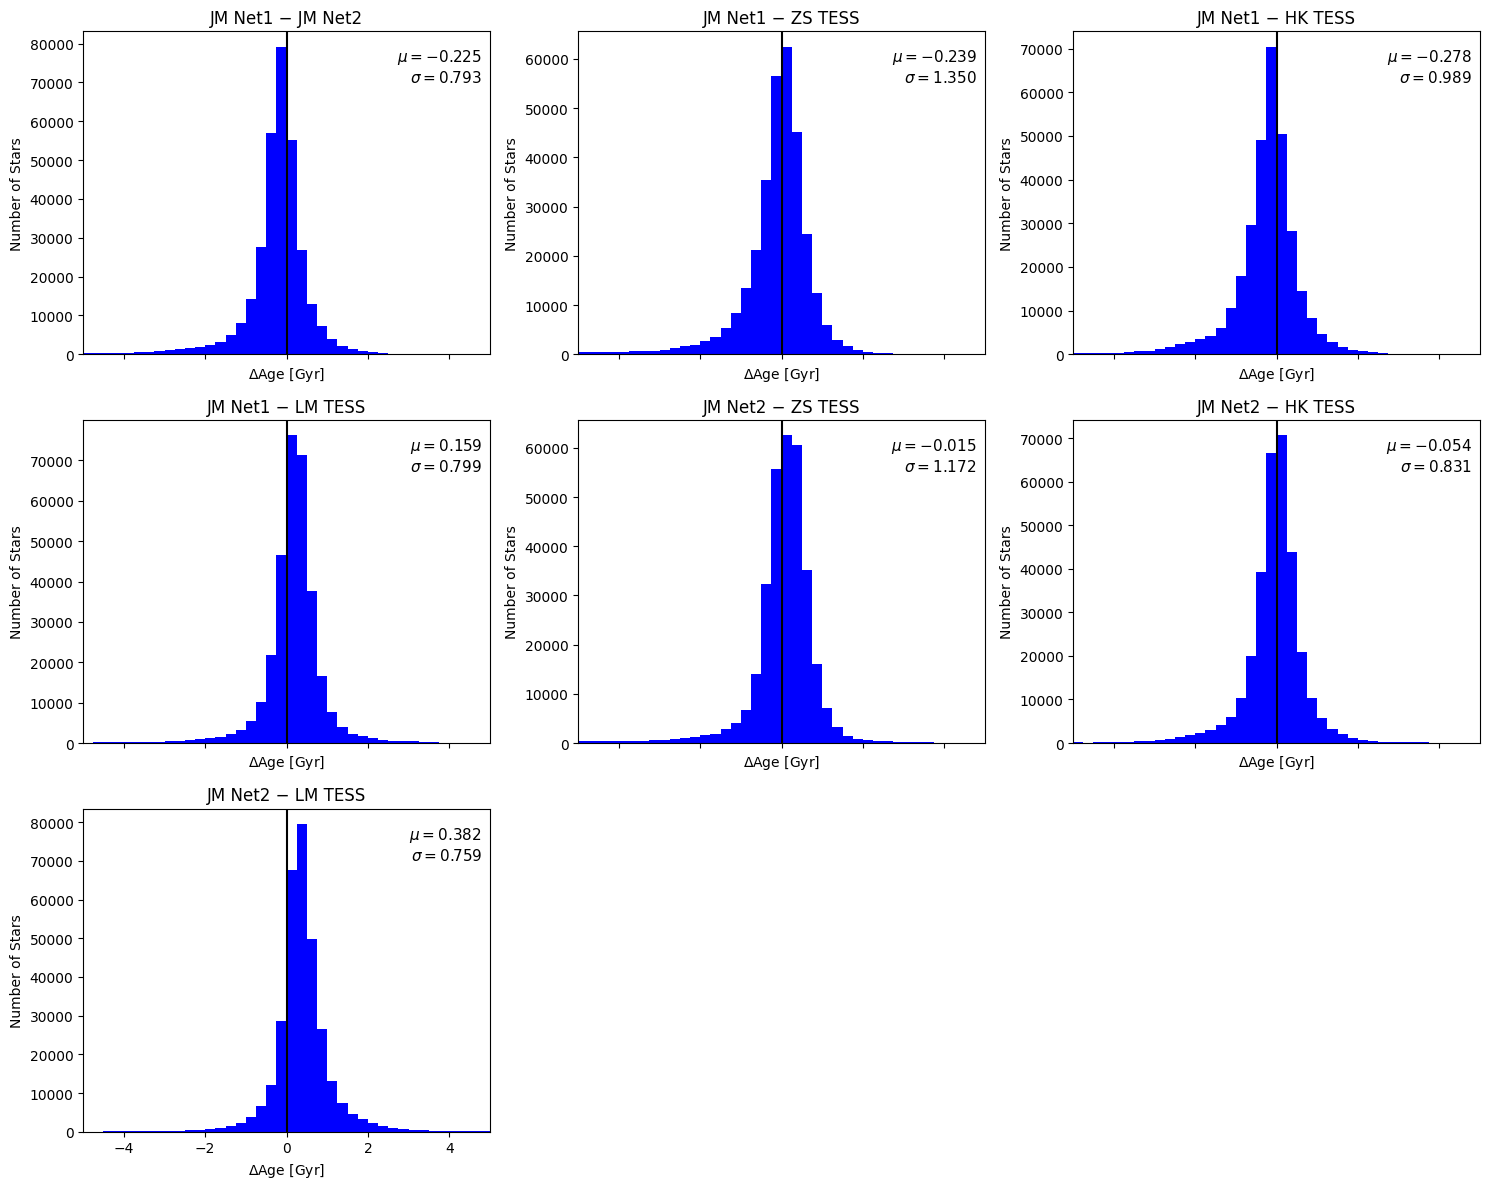

In [4]:
import numpy as np
import matplotlib.pyplot as plt

with fits.open(fname, memmap=True) as hdul:
    data = hdul["STARFLOW_TABLE"].data

feh_col = "fe_h"
c_col   = "c_h"
n_col   = "n_h"

def make_good(colA, colB):
    return (
        np.isfinite(data[colA]) & np.isfinite(data[colB]) &
        (data[colA] > 0) & (data[colB] > 0) &
        np.isfinite(data[feh_col]) & (data[feh_col] != -9999) &
        np.isfinite(data[c_col])   & (data[c_col]   != -9999) &
        np.isfinite(data[n_col])   & (data[n_col]   != -9999)
    )

def label(col):
    mapping = {
        "JM_TESS_Net1_Age": "JM Net1",
        "JM_TESS_Net2_Age": "JM Net2",
        "ZS_TESS_training_Age": "ZS TESS",
        "HK_TESS_training_Age": "HK TESS",
        "LM_TESS_training_Age": "LM TESS",
    }
    return mapping.get(col, col)

net1 = "JM_TESS_Net1_Age"
net2 = "JM_TESS_Net2_Age"
others = ["ZS_TESS_training_Age", "HK_TESS_training_Age", "LM_TESS_training_Age"]

pairs = [(net1, net2)] + [(net1, o) for o in others] + [(net2, o) for o in others]

xlim = (-5, 5)
bins = 40

n = len(pairs)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), sharex=True)
axes = np.atleast_1d(axes).ravel()

for ax, (A, B) in zip(axes, pairs):
    m = make_good(A, B)
    d = (data[A][m] - data[B][m]).ravel()

    mu = np.mean(d)
    sigma = np.std(d)

    ax.hist(d, bins=bins, range=xlim, color="blue")
    ax.axvline(0.0, color="k", linewidth=1.5)
    ax.set_xlim(xlim)

    ax.set_title(f"{label(A)} − {label(B)}")
    ax.set_xlabel(r"$\Delta$Age [Gyr]")
    ax.set_ylabel("Number of Stars")

    ax.text(0.98, 0.95,
            rf'$\mu={mu:.3f}$' + '\n' + rf'$\sigma={sigma:.3f}$',
            transform=ax.transAxes, ha='right', va='top', fontsize=11)

for ax in axes[len(pairs):]:
    ax.axis("off")

plt.tight_layout()
plt.show()